In [1]:
import sys
# !{sys.executable} -m pip install spacy
# !{sys.executable} -m pip install pyldavis
# !{sys.executable} -m spacy download en
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install biopython
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install imblearn
# !{sys.executable} -m pip install sklearn
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install xgboost
# !{sys.executable} -m pip install pyod
# !{sys.executable} -m pip install lightgbm
# !{sys.executable} -m pip install catboost 
# !{sys.executable} -m pip install plotly
# !{sys.executable} -m pip install cufflinks
# !{sys.executable} -m pip install pyclustering
# !{sys.executable} -m pip install beautifulsoup4
# !{sys.executable} -m pip install algorithmia
# !{sys.executable} -m pip install paramiko
# !{sys.executable} -m pip install gensim==3.8.3

In [55]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim import models
from gensim.models import LdaModel, CoherenceModel
from gensim.models.wrappers import LdaMallet
import pprint

# spacy for lemmatization
import spacy
from spacy.lang.en import English

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
reviews_datasets=pd.read_csv('D:/so-data/xamarin-posts.csv' , index_col='Id' )
# reviews_datasets=reviews_datasets.head(1000)
# postTagsRawData = pd.read_csv('PostTagsV3.csv', chunksize=1000)
# postTagsRawData = pd.read_excel('PostsTags2.xlsx')
print(reviews_datasets.head(20))

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


         AcceptedAnswerId  AnswerCount  \
Id                                       
1867029           1868486            3   
1674634           1674984            1   
32404               32440           13   
1593836           1593867            7   
1869258           1869370            2   
295169             295264            7   
1854                 1857           26   
1398586           1398779            4   
1434360           1436989            1   
3106                 3119            5   
1437640           1438174            3   
34328               34418            4   
1595409           1595536            4   
12144               12256           15   
12929               12945            4   
47177               47290           11   
1709679           1715808            1   
1802792           1804674            1   
1399647           1400373            2   
618483            1401624            5   

                                                      Body  \
Id           

C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [57]:
reviews_datasets.dropna()

# obody = reviews_datasets['Body']

# changed to append both title and body
reviews_datasets['CombinedTitleBody'] = reviews_datasets['Title']+' '+reviews_datasets['Body']
#reviews_datasets['CombinedTitleBody'] = reviews_datasets['Combined']
obody = reviews_datasets['CombinedTitleBody']

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
reviews_datasets.head()
#print(obody)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,LastEditDate,...,Score,Tags,Title,ViewCount,Answer,AnswerDate,AnswerDiff,Combined,AcceptedAnswerCount,CombinedTitleBody
Id,,,,,,,,,,,,,,,,,,,,,
7546412,7546460,3,"<p>I've read <a href=""https://gist.github.com/...",NaN,2,NaN,2011-09-25 15:16:11.123,1,2013-04-27 03:27:57.863,2013-04-27 03:27:57.863,...,7,<javascript><performance><dart>,How can Google's Dart get better performance?,3360,"<p>One example is <a href=""http://en.wikipedia...",2011-09-25 15:24:01.120,470.0,How can Google's Dart get better performance? ...,1,How can Google's Dart get better performance? ...
7818138,7818152,1,<p>I'm trying to build Dart on Windows XP (acc...,NaN,0,NaN,2011-10-19 07:50:54.907,0,2011-10-19 11:48:08.637,2011-10-19 11:48:08.637,...,1,<python><windows><dart>,Python error on building Dart on Windows,163,<p>Python 3 removes the <code>print</code> key...,2011-10-19 07:52:37.587,103.0,Python error on building Dart on Windows <p>I'...,1,Python error on building Dart on Windows <p>I'...
7732962,7825428,4,<p>How can I run a Dart application? Do I need...,NaN,0,NaN,2011-10-11 21:50:30.927,1,2018-07-02 08:22:13.587,2011-10-18 22:20:02.017,...,6,<windows><dart>,Where can I find the interpreter/compiler of D...,2933,<p>You can download Dart binaries for Windows ...,2011-10-19 17:28:20.577,675470.0,Where can I find the interpreter/compiler of D...,1,Where can I find the interpreter/compiler of D...
7717804,7717989,3,"<p>Google is launching a new language, promisi...",NaN,0,NaN,2011-10-10 19:42:51.963,0,2013-04-27 03:49:47.003,2011-10-11 14:34:26.137,...,7,<performance><web><performance-testing><dart>,How can I evaluate Dart performance?,1368,<p>Google promises better performance <em>late...,2011-10-10 20:00:32.433,1061.0,How can I evaluate Dart performance? <p>Google...,1,How can I evaluate Dart performance? <p>Google...
7715537,7717514,2,"<p>Dart, Google's new web language, says it su...",NaN,3,NaN,2011-10-10 16:00:37.447,2,2013-04-27 03:43:10.503,NaN,...,33,<javascript><dart>,What does Dart's output look like?,2687,"<pre><code>main() {\n print('Hello, Dart!...",2011-10-10 19:17:52.437,11835.0,"What does Dart's output look like? <p>Dart, Go...",1,"What does Dart's output look like? <p>Dart, Go..."


In [58]:
from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk

import re
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup

tokenizer = ToktokTokenizer()
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))
stop_words.update(['.',',','"',"'",'?','!',':', ";",', ',',  ',',   ', '(',')','[',']','{','}','#','...','--',"'s",'also',
                      '&','-','--','=','known','mi','km','$',"'",'`'])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
def transform_text(text): 

    soup = BeautifulSoup(text)
    for elm in soup.find_all():
        if '<code>'== str(elm)[0:6]:
            elm.decompose()
    textStr = str(soup.get_text())
    textStr = textStr.replace('<html>','')
    textStr = textStr.replace('</html>','')
    textStr = textStr.replace('<body>','')
    textStr = textStr.replace('</body>','')
    textStr = textStr.replace('<p>','')
    textStr = textStr.replace('</p>','')
    textStr = textStr.replace('<pre>','')
    textStr = textStr.replace('</pre>','')
    
    #     remove lines
    textStr = textStr.strip()
    # remove numbers
    textStr = re.sub(r"\d","", textStr)
    
    return textStr

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
print(transform_text('<p>hello there I will kill you. Then I will be playing cricket <code>I am inside code</code> </p>134'))

hello there I will kill you. Then I will be playing cricket  


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
import re

# Convert to list
data = reviews_datasets.CombinedTitleBody.values.tolist()

# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
data = [transform_text(sent) for sent in data]

# Remove distracting single and double quotes
data = [re.sub("\'", "", sent) for sent in data]
data = [re.sub('\", "', '', sent) for sent in data]
data = [re.sub('\\"', '', sent) for sent in data]
data = [re.sub('\"', '', sent) for sent in data]
data = [re.sub('[\\:"]', '', sent) for sent in data]

# Remove web links
data = [re.sub(r'^https?:\/\/.*[\r\n]*', '', sent) for sent in data]

print(data[:3])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Is there a mono (.Net) equivalent to the Scanner-class in Java In Java there is a nice class called Scanner for reading strings and streams of a certain format to data-structures like integers, floats,... Is there any equivalent in Mono? In .Net there is a binary-reader, but it reads the data as binaries. I want a class that read the data by parsing it from a string. EDIT reaction on the current answers, I know most of the data-types have a parse-method, but the problem with these are, they dont read the string sequentially. In Java you simply initialize the object, and by activating methods, you sequentially read the data-types.', 'URI Escape C++ wstring I am looking for a good way to do a URI Escape in C++ that would be reasonable for a cross platform project. I would like a function that would take a string like this  And return  I looked at using some thing like this, with minor modifacations to use wchar_t. However that would require converting from utf- to utf- before the print

In [61]:
# Tokenize words and text clean up
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:3])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['is', 'there', 'mono', 'net', 'equivalent', 'to', 'the', 'scanner', 'class', 'in', 'java', 'in', 'java', 'there', 'is', 'nice', 'class', 'called', 'scanner', 'for', 'reading', 'strings', 'and', 'streams', 'of', 'certain', 'format', 'to', 'data', 'structures', 'like', 'integers', 'floats', 'is', 'there', 'any', 'equivalent', 'in', 'mono', 'in', 'net', 'there', 'is', 'binary', 'reader', 'but', 'it', 'reads', 'the', 'data', 'as', 'binaries', 'want', 'class', 'that', 'read', 'the', 'data', 'by', 'parsing', 'it', 'from', 'string', 'edit', 'reaction', 'on', 'the', 'current', 'answers', 'know', 'most', 'of', 'the', 'data', 'types', 'have', 'parse', 'method', 'but', 'the', 'problem', 'with', 'these', 'are', 'they', 'dont', 'read', 'the', 'string', 'sequentially', 'in', 'java', 'you', 'simply', 'initialize', 'the', 'object', 'and', 'by', 'activating', 'methods', 'you', 'sequentially', 'read', 'the', 'data', 'types'], ['uri', 'escape', 'wstring', 'am', 'looking', 'for', 'good', 'way', 'to', 'd

In [62]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=75) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=75)  


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[3]]])

['how', 'can', 'evaluate', 'dart', 'performance', 'google', 'is', 'launching', 'new', 'language', 'promising', 'that', 'it', 'has', 'better', 'performance', 'but', 'how', 'can', 'evaluate', 'performance', 'in', 'dart', 'source', 'code', 'lets', 'take', 'as', 'example', 'the', 'sun', 'flower', 'drawframe', 'method', 'if', 'we', 'have', 'lots', 'of', 'could', 'we', 'add', 'statement', 'to', 'evaluate', 'elapsed', 'time', 'within', 'google', 'promises', 'better', 'performance', 'later', 'on', 'when', 'there', 'is', 'native', 'dart', 'in', 'the', 'browser', 'for', 'now', 'dart', 'compiles', 'directly', 'to', 'javascript', 'and', 'is', 'larger', 'and', 'slower', 'than', 'writing', 'pure', 'javascript', 'the', 'function', 'you', 'have', 'right', 'there', 'is', 'actually', 'identical', 'in', 'pure', 'javascript', 'so', 'the', 'runtime', 'ought', 'to', 'be', 'very', 'nearly', 'the', 'same', 'between', 'compiled', 'dart', 'and', 'direct', 'javascript', 'version', 'you', 'could', 'compare', 'the

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
spacy.load('en_core_web_sm')

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
#spacy.load('en_core_web_sm')

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
reviews_datasets.head(20)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,LastEditDate,...,Score,Tags,Title,ViewCount,Answer,AnswerDate,AnswerDiff,Combined,AcceptedAnswerCount,CombinedTitleBody
Id,,,,,,,,,,,,,,,,,,,,,
7546412,7546460,3,"<p>I've read <a href=""https://gist.github.com/...",NaN,2,NaN,2011-09-25 15:16:11.123,1,2013-04-27 03:27:57.863,2013-04-27 03:27:57.863,...,7,<javascript><performance><dart>,How can Google's Dart get better performance?,3360,"<p>One example is <a href=""http://en.wikipedia...",2011-09-25 15:24:01.120,470.0,How can Google's Dart get better performance? ...,1,How can Google's Dart get better performance? ...
7818138,7818152,1,<p>I'm trying to build Dart on Windows XP (acc...,NaN,0,NaN,2011-10-19 07:50:54.907,0,2011-10-19 11:48:08.637,2011-10-19 11:48:08.637,...,1,<python><windows><dart>,Python error on building Dart on Windows,163,<p>Python 3 removes the <code>print</code> key...,2011-10-19 07:52:37.587,103.0,Python error on building Dart on Windows <p>I'...,1,Python error on building Dart on Windows <p>I'...
7732962,7825428,4,<p>How can I run a Dart application? Do I need...,NaN,0,NaN,2011-10-11 21:50:30.927,1,2018-07-02 08:22:13.587,2011-10-18 22:20:02.017,...,6,<windows><dart>,Where can I find the interpreter/compiler of D...,2933,<p>You can download Dart binaries for Windows ...,2011-10-19 17:28:20.577,675470.0,Where can I find the interpreter/compiler of D...,1,Where can I find the interpreter/compiler of D...
7717804,7717989,3,"<p>Google is launching a new language, promisi...",NaN,0,NaN,2011-10-10 19:42:51.963,0,2013-04-27 03:49:47.003,2011-10-11 14:34:26.137,...,7,<performance><web><performance-testing><dart>,How can I evaluate Dart performance?,1368,<p>Google promises better performance <em>late...,2011-10-10 20:00:32.433,1061.0,How can I evaluate Dart performance? <p>Google...,1,How can I evaluate Dart performance? <p>Google...
7715537,7717514,2,"<p>Dart, Google's new web language, says it su...",NaN,3,NaN,2011-10-10 16:00:37.447,2,2013-04-27 03:43:10.503,NaN,...,33,<javascript><dart>,What does Dart's output look like?,2687,"<pre><code>main() {\n print('Hello, Dart!...",2011-10-10 19:17:52.437,11835.0,"What does Dart's output look like? <p>Dart, Go...",1,"What does Dart's output look like? <p>Dart, Go..."
7722583,7722620,2,<p>I am having a hard time understanding what ...,2011-10-12 01:13:33.767,2,NaN,2011-10-11 07:19:21.543,5,2013-04-15 19:41:49.047,2013-04-15 19:41:49.047,...,21,<dart>,What is the role of Google's Dart programming ...,3830,<p>You may checkout the technical aspects on <...,2011-10-11 07:22:05.483,164.0,What is the role of Google's Dart programming ...,1,What is the role of Google's Dart programming ...
7722867,7723239,2,<blockquote>\n <p><strong>Notice:</strong> Th...,NaN,4,NaN,2011-10-11 07:47:57.973,3,2014-02-18 00:49:27.573,2014-02-18 00:49:27.573,...,12,<interface><dart>,Why can Dart's built-in List interface be inst...,1039,<p>The syntax for defining an interface is:</p...,2011-10-11 08:27:48.873,2391.0,Why can Dart's built-in List interface be inst...,1,Why can Dart's built-in List interface be inst...
7712107,7712138,2,"<p>I don't see the point of <a href=""http://ww...",2012-08-30 14:41:38.983,3,NaN,2011-10-10 11:28:28.783,7,2015-10-29 21:53:31.640,2012-12-27 19:35:12.373,...,49,<javascript><node.js><dart>,What is the benefit of the Dart language over ...,10329,"<p>The <a href=""http://www.dartlang.org/docs/t...",2011-10-10 11:32:06.053,218.0,What is the benefit of the Dart language over ...,1,What is the benefit of the Dart language over ...
7724136,7724281,2,<p>Will I get replacement of <strong>node.js</...,2011-10-11 11:03:28.730,2,NaN,2011-10-11 09:46:44.253,2,2019-06-29 16:49:24.597,2019-06-29 16:49:24.597,...,9,<javascript><node.js><dart>,Comparison of Javascript with Google Dart,6899,"<p>You can read about Dart at <a href=""http://...",2011-10-11 09:59:45.297,781.0,Comparison of Javascript with Google Dart 

In [66]:
print(data_lemmatized[:2])

reviews_datasets['topics']=data_lemmatized
reviews_datasets['obody']=obody
cview = reviews_datasets['ViewCount'].astype(int)
avgfav = reviews_datasets['FavoriteCount'].astype(int)
avgscore = reviews_datasets['Score'].astype(int)
body = reviews_datasets['Body']
titles = reviews_datasets['Title']
caccepans = reviews_datasets['AcceptedAnswerCount']
ansdelay = reviews_datasets['AnswerDiff']
avgdelay = ansdelay.fillna(0)
reviews_datasets.head(20)
#reset option to default value

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['mono', 'net', 'equivalent', 'scanner', 'class', 'java', 'java', 'nice', 'class', 'call', 'scanner', 'reading', 'string', 'stream', 'certain', 'format', 'datum', 'structure', 'integer', 'float', 'equivalent', 'mono', 'net', 'binary', 'reader', 'read', 'datum', 'binary', 'want', 'class', 'read', 'datum', 'parse', 'string', 'edit', 'reaction', 'current', 'answer', 'know', 'datum', 'type', 'parse', 'method', 'problem', 'do', 'read', 'string', 'sequentially', 'java', 'simply', 'initialize', 'object', 'activate', 'method', 'sequentially', 'read', 'data', 'type'], ['escape', 'wstre', 'look', 'good', 'way', 'escape', 'reasonable', 'cross_platform', 'project', 'like', 'function', 'take', 'string', 'return', 'look', 'use', 'thing', 'minor', 'modifacation', 'use', 'however', 'require', 'convert', 'utf', 'utf', 'printf', 'call', 'lead', 'character', 'encode', 'hell', 'approach', 'look', 'feel', 'wrong', 'way', 'good', 'way', 'escape', 'wstre']]


,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,LastEditDate,...,Title,ViewCount,Answer,AnswerDate,AnswerDiff,Combined,AcceptedAnswerCount,CombinedTitleBody,topics,obody
Id,,,,,,,,,,,,,,,,,,,,,
1867029,1868486,3,<p>In Java there is a nice class called Scanne...,NaN,3,NaN,2009-12-08 13:38:38.553,2,2011-05-15 13:02:52.873,2011-05-15 13:02:52.873,...,Is there a mono (.Net) equivalent to the Scann...,595,"<p>Well, since you are reading a file in for t...",2009-12-08 17:21:32.510,13374.0,Is there a mono (.Net) equivalent to the Scann...,1,Is there a mono (.Net) equivalent to the Scann...,"[mono, net, equivalent, scanner, class, java, ...",Is there a mono (.Net) equivalent to the Scann...
1674634,1674984,1,<p>I am looking for a good way to do a URI Esc...,NaN,2,NaN,2009-11-04 15:43:31.573,1,2009-11-04 16:28:40.880,NaN,...,URI Escape C++ wstring,934,<p>No matter what you do you're in some sort o...,2009-11-04 16:28:40.880,2709.0,URI Escape C++ wstring <p>I am looking for a g...,1,URI Escape C++ wstring <p>I am looking for a g...,"[escape, wstre, look, good, way, escape, reaso...",URI Escape C++ wstring <p>I am looking for a g...
32404,32440,13,<p>I am sketching the architecture for a set o...,NaN,0,NaN,2008-08-28 14:28:04.493,237,2020-11-01 22:22:07.013,2018-02-27 21:29:18.850,...,How do you run a Python script as a service in...,290934,<p>Yes you can. I do it using the pythoncom li...,2008-08-28 14:39:04.763,660.0,How do you run a Python script as a service in...,1,How do you run a Python script as a service in...,"[run, python, script, service, window, sketch,...",How do you run a Python script as a service in...
1593836,1593867,7,<p>Official Mono project website says that Mon...,NaN,3,NaN,2009-10-20 11:01:27.750,1,2013-04-13 19:18:07.127,2017-05-23 10:27:33.383,...,Is Mono really cross-platform?,2370,<p>Yes it is possible.</p>\n\n<p>It generally ...,2009-10-20 11:10:06.433,519.0,Is Mono really cross-platform? <p>Official Mon...,1,Is Mono really cross-platform? <p>Official Mon...,"[mono, really, cross_platform, official, mono,...",Is Mono really cross-platform? <p>Official Mon...
1869258,1869370,2,<p>I've been working on a Composite WPF applic...,NaN,0,NaN,2009-12-08 19:26:54.583,0,2011-08-29 21:11:29.827,2011-08-29 21:11:29.827,...,Minimizing the number of DLLs while keeping Co...,100,"<p>Besides YAGNI, remember also the <a href=""h...",2009-12-08 19:45:19.577,1105.0,Minimizing the number of DLLs while keeping Co...,1,Minimizing the number of DLLs while keeping Co...,"[minimize, number, dll, keep, modular, ve, wor...",Minimizing the number of DLLs while keeping Co...
295169,295264,7,<p>A program written in Visual C/C++ 2005/2008...,NaN,0,NaN,2008-11-17 09:23:05.647,4,2009-12-23 00:53:08.377,2009-01-07 17:13:38.683,...,What are the practical differences between C c...,5187,<p>The first thing to do when trying to compil...,2008-11-17 10:25:42.243,3757.0,What are the practical differences between C c...,1,What are the practical differences between C c...,"[practical, difference, compiler, window, prog...",What are the practical differences between C c...
1854,1857,26,<p>What do I need to look at to see whether I'...,NaN,2,NaN,2008-08-05 03:23:18.917,140,2020-10-20 12:03:31.183,2020-08-21 17:01:06.543,...,Python: What OS am I running on?,334209,<pre><code>&gt;&gt;&gt; import os\n&gt;&gt;&gt...,2008-08-05 03:27:03.760,225.0,Python: What OS am I running on? <p>What do I ...,1,Python: What OS am I running on? <p>What do I ...,"[python, run, need, look, see, m, window, unix]",Python: What OS am I running on? <p>What do I ...
1398586,1398779,4,<p>Is there an F# compiler (plugin?) for Sharp...,NaN,0,NaN,2009-09-09 09:39:06.687,0,2011-10-13 10:23:39.197,2009-09-10 00:33:25.117,...,F# on/in SharpDevelop?,1592,"<p>If you install the <a href=""http://research...",2009-09-09 10:18:28.917,2362.0,F# on/in SharpDevelop? <p>Is there an F# compi...,1,F# on/in SharpDevelop? <p>I

In [25]:
reviews_datasets.to_csv("D:/so-data/output1.csv")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = 'D:\\so-data\\mallet-2.0.8\\mallet-2.0.8'

mallet_path = 'D:\\so-data\\mallet-2.0.8\\mallet-2.0.8\\bin\\mallet'

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=30, id2word=id2word, optimize_interval=10, iterations=1500)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# gensim.models.LdaModel?

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=15, step=5):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=15, limit=45, step=5)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


15
20
25
30
35
40


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


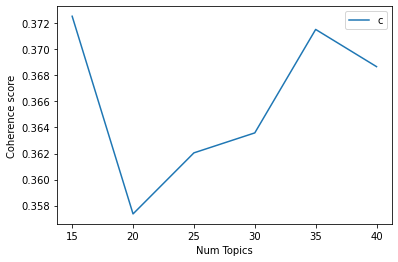

In [54]:
#Show graph
limit=45; start=15; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [25]:
# print(coherence_values)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
def calculate_best_iterations(number_of_topics, number_of_iterations):
    print(number_of_iterations)
    lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus = corpus, num_topics= number_of_topics, id2word= id2word, optimize_interval=10, iterations= number_of_iterations)
    coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    iterations.append(number_of_iterations)
    iteration_based_coherence_values.append(coherence_model_ldamallet.get_coherence())

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
iterations = []
iteration_based_coherence_values = []

for i in [500,1000,1500,2000,2500, 3000]:
    calculate_best_iterations(25, i)

#Show graph
limit=3000; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, iteration_based_coherence_values)
plt.xlabel("Num of iterations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


500
1000
1500
2000
2500
3000


In [25]:
for i in iteration_based_coherence_values:
    print(i)

0.5903237687473161
0.6046844485178203
0.5963421167871027
0.5910408489530792
0.5842180951385919
0.5903513586741778


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Show graph
limit=3000; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, iteration_based_coherence_values)
plt.xlabel("Num of iterations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [28]:
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=25, id2word=id2word, optimize_interval=10, iterations=1500, alpha=5)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
###################################
# topic development
###################################

def format_topics_sentences(ldamodel=lda_mallet, corpus=corpus, texts=data_lemmatized, title=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    contents2 = pd.Series(title)
    sent_topics_df = pd.concat([sent_topics_df, contents, contents2], axis=1)
    return(sent_topics_df)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet, corpus=corpus, texts=body, title=titles)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'texts', 'title']
df_dominant_topic.to_csv("E:/so-data/final_topics_with_body_23042021_500.csv")